This notebook is implemented to count the vehicles without tracking algorithms. <br>
It uses the license plate number to dertermine the counting. <br>
I will be using pre-trained YOLO-V8 for this experiment

#### Object Detction

In [1]:
from ultralytics import YOLO
 
# load YOLO-V8 model 
model = YOLO("yolov8n.pt")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Shape of the origianl car image: (5472, 3648, 3)


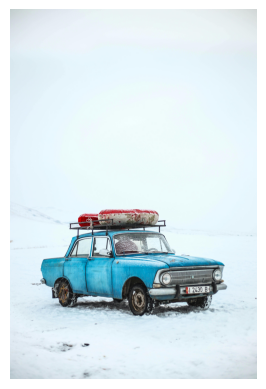

In [3]:
# defining the car path 
car_path = "car.jpg"
car_img = cv2.imread(car_path)
print(f"Shape of the origianl car image: {car_img.shape}")
plt.imshow(car_img[:,:,::-1])
plt.axis("off")
plt.show()

In [4]:
# Run inference on 'bus.jpg' and store results
results = model.predict(car_path)

# Process and store results
for result in results:
    boxes = result.boxes  # Bounding boxes
    scores = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class indices
    keypoints = result.keypoints  # If the model supports keypoints

    # Example: Store as a dictionary
    prediction_data = {
        "boxes": boxes.xyxy.cpu().numpy(),  # Convert to NumPy array
        "scores": scores.cpu().numpy(),
        "classes": classes.cpu().numpy(),
    }


image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\car.jpg: 640x448 1 truck, 30.1ms
Speed: 2.2ms preprocess, 30.1ms inference, 48.4ms postprocess per image at shape (1, 3, 640, 448)


In [5]:
# plot the predicted result image
results[0].show()

Result: Class 7: 0.65


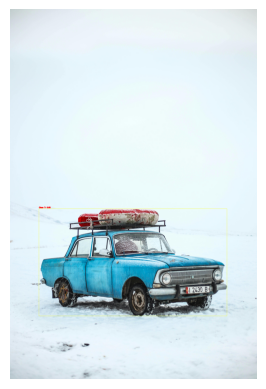

In [6]:
# Draw bounding boxes on the image
for i in range(len(prediction_data["boxes"])):
    box = prediction_data["boxes"][i]
    score = prediction_data["scores"][i]
    cls = prediction_data["classes"][i]
    
    # Draw bounding box (x1, y1, x2, y2)
    x1, y1, x2, y2 = box.astype(int)
    
    # Optional: Use a color for the box based on class (you can customize it)
    # color = (0, 255, 0)  # Green for bounding boxes (you can change this)
    color = (0, 255, 255)  # Yellow (BGR)
    red = (0, 0, 255)
    # Draw the bounding box
    cv2.rectangle(car_img, (x1, y1), (x2, y2), color, 2)
    
    # Add the label and confidence score
    label = f"Class {int(cls)}: {score:.2f}"
    print(f"Result: {label}")
    cv2.putText(car_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, red, 5)

plt.imshow(car_img[:,:,::-1])
plt.axis("off")
plt.show()

In [7]:
results[0].names[7]

'truck'

Shape of the cropped image: (1586, 2777, 3)


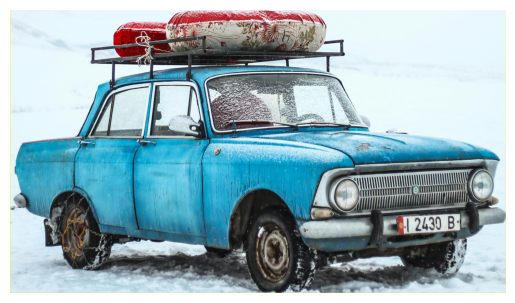

In [9]:
# crop the predicted box image 
# Loop through the detected bounding boxes
for i in range(len(prediction_data["boxes"])):
    box = prediction_data["boxes"][i]
    score = prediction_data["scores"][i]
    
    # Get the bounding box coordinates (x1, y1, x2, y2)
    x1, y1, x2, y2 = box.astype(int)
    
    # Crop the image using the bounding box coordinates
    cropped_img = car_img[y1:y2, x1:x2]
    print(f"Shape of the cropped image: {cropped_img.shape}")
    
    # Optional: Save the cropped region as a new image
    cv2.imwrite(f"cropped_{i}.jpg", cropped_img)
    
    # If you want to visualize it:
    plt.imshow(cropped_img[:,:,::-1])
    plt.axis("off")
    plt.show()

In [93]:
# writing a function to get the predicted boxes, class, score, cropped images 
def get_vehicle(model, image):
    """
    This function will take an image or video frame and will pass through the 
    object detector to detect vehicle. It will store those information in a 
    dictionary and returns it
    """
    results = model.predict(image)
    
    # Process and store results
    for result in results:
        boxes = result.boxes  # Bounding boxes
        scores = result.boxes.conf  # Confidence scores
        classes = result.boxes.cls  # Class indices
        keypoints = result.keypoints  # If the model supports keypoints
    
        # Example: Store as a dictionary
        prediction_data = {
            "boxes": boxes.xyxy.cpu().numpy(),  # Convert to NumPy array
            "scores": scores.cpu().numpy(),
            "classes": classes.cpu().numpy(),
        }
    cropped_images = []
    for i in range(len(prediction_data["boxes"])):
        box = prediction_data["boxes"][i]
        
        # Get the bounding box coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.astype(int)
        # Crop the image using the bounding box coordinates
        cropped_img = car_img[y1:y2, x1:x2]
        cropped_images.append(cropped_image)
    pass

##### Multiple Vehicle

Shape of the sample image: (1289, 2448, 3)


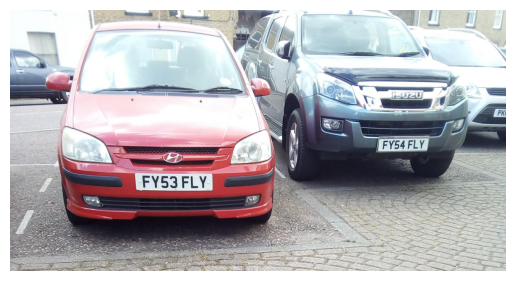

In [114]:
# we will try for multiple vehicles 
sample_1_path = "Images/image_2.jpg"
sample_1_img = cv2.imread(sample_1_path)
# preserving the original image 
sample_img_org = sample_1_img.copy()
print(f"Shape of the sample image: {sample_1_img.shape}")
plt.imshow(sample_1_img[:,:,::-1])
plt.axis("off")
plt.show()

In [115]:
# get the sample results 
sample_results = model.predict(sample_1_path)


image 1/1 C:\Users\AI\Desktop\Tarek\Vehicle Tracking\Images\image_2.jpg: 352x640 4 cars, 98.6ms
Speed: 3.5ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


In [84]:
# visualize the result
sample_results[0].show()

In [116]:
# Process and store results
for result in sample_results:
    boxes = result.boxes  # Bounding boxes
    scores = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class indices
    print(f"Classes: {classes}")

# Example: Store as a dictionary
prediction_data = {
    "boxes": boxes.xyxy.cpu().numpy(),  # Convert to NumPy array
    "scores": scores.cpu().numpy(),
    "classes": classes.cpu().numpy(),
}

Classes: tensor([2., 2., 2., 2.], device='cuda:0')


In [117]:
prediction_data

{'boxes': array([[     1121.2,           0,      2273.8,      850.68],
        [     225.48,      55.485,      1322.5,      1057.6],
        [     1974.9,      89.659,      2447.7,      661.32],
        [    0.62185,      188.16,      316.98,       468.7]], dtype=float32),
 'scores': array([    0.90738,     0.89451,     0.87683,     0.83803], dtype=float32),
 'classes': array([          2,           2,           2,           2], dtype=float32)}

Car ID: 0
Class ID: 2
Class name: car


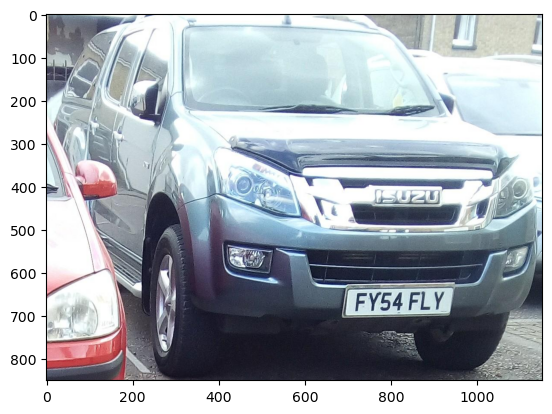

Car ID: 1
Class ID: 2
Class name: car


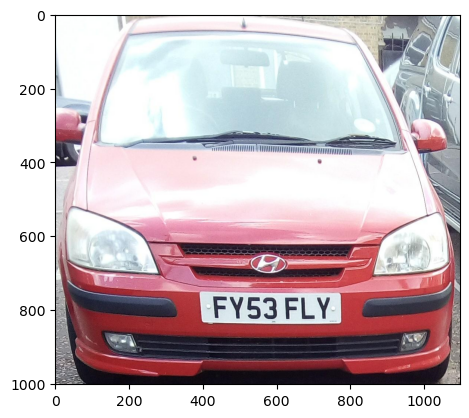

Car ID: 2
Class ID: 2
Class name: car


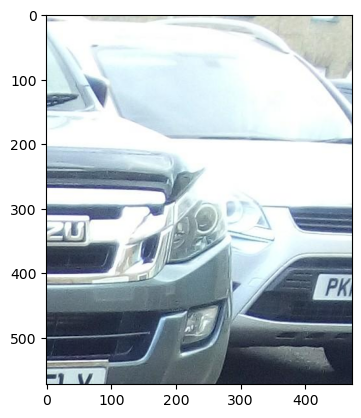

Car ID: 3
Class ID: 2
Class name: car


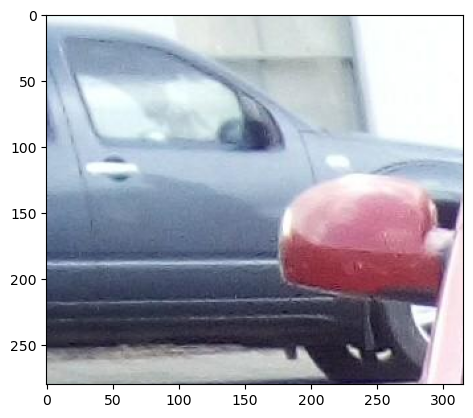

In [118]:
for i in range(len(prediction_data["boxes"])):
    box = prediction_data["boxes"][i]
    print(f"Car ID: {i}")
    
    # Get the bounding box coordinates (x1, y1, x2, y2)
    x1, y1, x2, y2 = box.astype(int)
    # Crop the image using the bounding box coordinates
    cropped_vehicle = sample_1_img[y1:y2, x1:x2]
    # get the class names
    class_id = int(prediction_data['classes'][i])
    print(f"Class ID: {class_id}")
    class_name = sample_results[0].names[class_id]
    print(f"Class name: {class_name}")
    plt.imshow(cropped_vehicle[:,:,::-1])
    plt.show()
    

Vehicle ID: 0
Class ID: 2
Class name: car


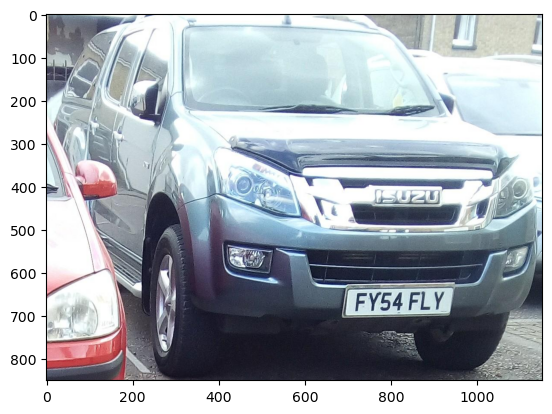

Vehicle ID: 1
Class ID: 2
Class name: car


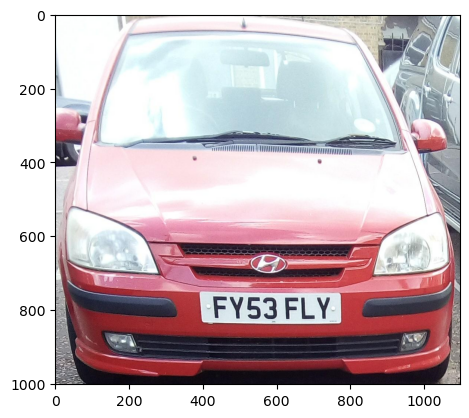

Vehicle ID: 2
Class ID: 2
Class name: car


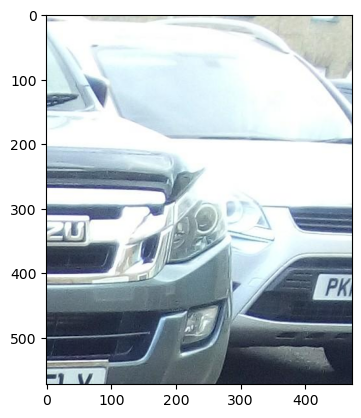

Vehicle ID: 3
Class ID: 2
Class name: car


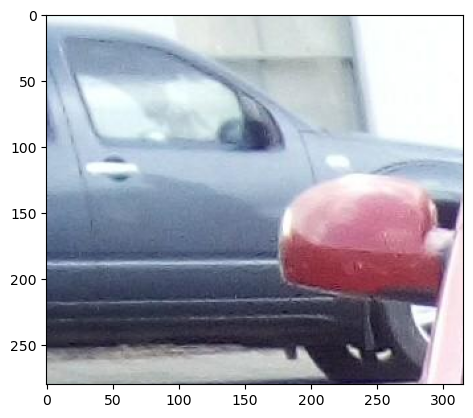

In [119]:
desired_classes = [2,3,5,7]
cropped_images = []

for i in range(len(prediction_data["boxes"])):
    # taking only those boxes that contains vehicles 
    if int(prediction_data['classes'][i]) in desired_classes:
        box = prediction_data["boxes"][i]
        print(f"Vehicle ID: {i}")
        # Get the bounding box coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.astype(int)
        # Crop the image using the bounding box coordinates
        cropped_img = sample_1_img[y1:y2, x1:x2]
        # get the class names
        class_id = int(prediction_data['classes'][i])
        print(f"Class ID: {class_id}")
        class_name = sample_results[0].names[class_id]
        print(f"Class name: {class_name}")
        plt.imshow(cropped_img[:,:,::-1])
        plt.show()
        

In [120]:
# FINALY, WE CAN STORE THOSE VEHICLES INTO A LIST TO FURTHER USAGE
cropped_images_data = []  # List to store cropped images and metadata

for i in range(len(prediction_data["boxes"])):
    # taking only those boxes that contains vehicles 
    if int(prediction_data['classes'][i]) in desired_classes:
        box = prediction_data["boxes"][i]
        # Get the bounding box coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.astype(int)
        
        # Crop the image using the bounding box coordinates
        cropped_img = sample_1_img[y1:y2, x1:x2]
        
        # Store the cropped image and metadata in a dictionary
        cropped_images_data.append({
            "cropped_image": cropped_img,    # The cropped image
            "class": int(prediction_data['classes'][i]),  # The class of the object
            "score": float(prediction_data['scores'][i])  # The confidence score
        })

# Now, cropped_images_data contains a list of dictionaries with cropped images and their metadata


In [121]:
# CHECK THOSE DATA FOR VALIDATION
for data in cropped_images_data:
    cropped_img = data['cropped_image']
    print(f"Cropped image shape: {cropped_img.shape}")
    obj_class = data['class']
    print(f"Cropped class: {obj_class}")
    obj_score = data['score']
    # You can process them as needed


Cropped image shape: (850, 1152, 3)
Cropped class: 2
Cropped image shape: (1002, 1097, 3)
Cropped class: 2
Cropped image shape: (572, 473, 3)
Cropped class: 2
Cropped image shape: (280, 316, 3)
Cropped class: 2


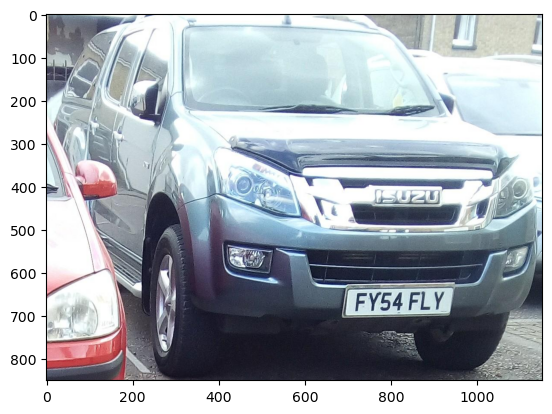

In [122]:
plt.imshow(cropped_images_data[0]['cropped_image'][:,:,::-1])
plt.show()

#### License Plate Detection

In [10]:
# loading license plate detector model
license_plate_detector = YOLO('license_plate_det/best.pt')

In [11]:
# forward pass 
# Run inference on an image
license_plate_results = license_plate_detector(cropped_img) 


0: 384x640 1 LicensePlate, 27.5ms
Speed: 2.0ms preprocess, 27.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [36]:
license_plate_results[0].show()

In [13]:
license_plate_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'LicensePlate'}
 obb: None
 orig_img: array([[[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255],
         ...,
         [  0, 255, 255],
         [  0, 255, 255],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [251, 243, 226],
         ...,
         [255, 248, 233],
         [255, 248, 233],
         [  0, 255, 255]],
 
        ...,
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [239, 232, 212],
         ...,
         [244, 237, 217],
         [244, 237, 217],
         [  0, 255, 255]],
 
        [[  0, 255, 255],
         [  0, 255, 255],
         [239, 232, 212],
         ...,
         [24

In [14]:
# Initialize dictionary
license_plate_data = {"boxes": [], "scores": []}

# Process results
for result in license_plate_results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes (x1, y1, x2, y2)
    scores = result.boxes.conf.cpu().numpy()  # Extract confidence scores

    # # Store in dictionary
    # license_plate_data["boxes"].extend(boxes.tolist())  # Convert NumPy to list
    # license_plate_data["scores"].extend(scores.tolist())

license_plate_data = {
        "boxes": boxes,
        "scores": scores
    }

# Print extracted data
print(license_plate_data)

{'boxes': array([[     2087.2,      1128.5,      2536.8,      1257.9]], dtype=float32), 'scores': array([    0.84654], dtype=float32)}


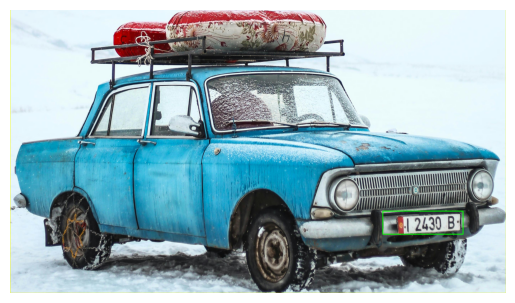

In [17]:
# Process results
for plate in license_plate_results:
    boxes = plate.boxes.xyxy.cpu().numpy()  # Get bounding boxes (x1, y1, x2, y2)
    
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)  # Convert to integer
        cv2.rectangle(cropped_img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw bounding box

# Show image with bounding boxes
plt.imshow(cropped_img[:,:,::-1])
plt.axis("off")
plt.show()

Shape of the cropped image: (129, 449, 3)


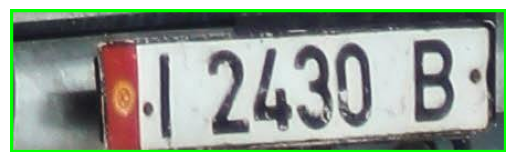

In [18]:
# crop the license plate 
# Loop through the detected bounding boxes
for i in range(len(license_plate_data["boxes"])):
    box = license_plate_data["boxes"][i]
    score = license_plate_data["scores"][i]
    
    # Get the bounding box coordinates (x1, y1, x2, y2)
    x1, y1, x2, y2 = box.astype(int)
    
    # Crop the image using the bounding box coordinates
    plate = cropped_img[y1:y2, x1:x2]
    print(f"Shape of the cropped image: {plate.shape}")
    
    # Optional: Save the cropped region as a new image
    cv2.imwrite(f"plate_{i}.jpg", plate)
    
    # If you want to visualize it:
    plt.imshow(plate[:,:,::-1])
    plt.axis("off")
    plt.show()

##### Multiple Vehicles


0: 480x640 2 LicensePlates, 156.3ms
Speed: 7.0ms preprocess, 156.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Total detected Boxes: 2
Detected Boxes: [[     691.25      629.22      953.56      700.68]
 [     762.53      397.03      918.23      439.25]]
Conf Score: [    0.90922     0.26403]


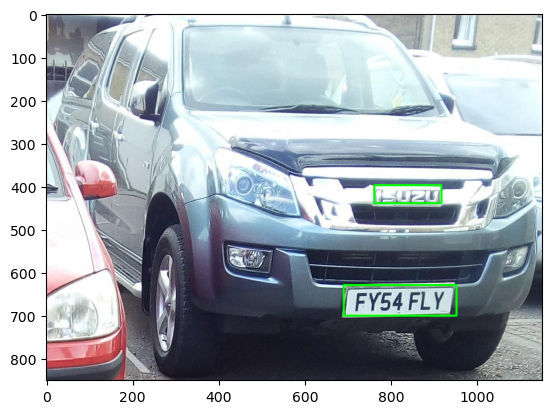


0: 608x640 1 LicensePlate, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 640)
Total detected Boxes: 1
Detected Boxes: [[     384.43      747.61      779.84       840.1]]
Conf Score: [    0.91219]


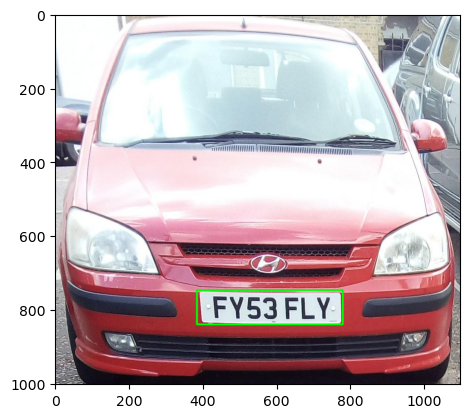


0: 640x544 2 LicensePlates, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)
Total detected Boxes: 2
Detected Boxes: [[     412.17      396.99         473      444.56]
 [          0      541.21       94.72      571.45]]
Conf Score: [    0.43457     0.43103]


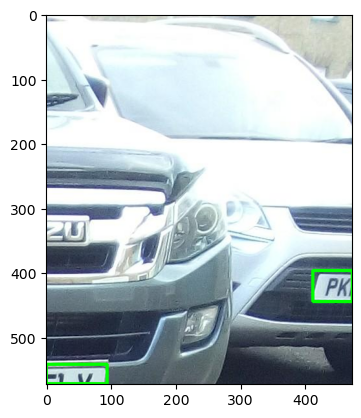


0: 576x640 (no detections), 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 576, 640)
Total detected Boxes: 0
Detected Boxes: []
Conf Score: []


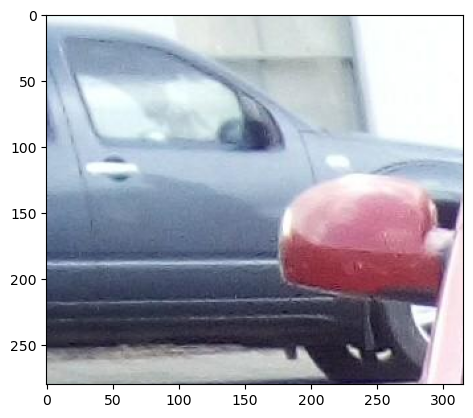

In [127]:
n_license_plates = []

cropped_images_org = cropped_images_data.copy()

for data in cropped_images_data:
    cropped_img = data['cropped_image']
    annote_img = cropped_img.copy()
    obj_class = data['class']
    obj_score = data['score']
    
    # plot the image to verify 
    # plt.imshow(cropped_img[:,:,::-1])
    # plt.show()

    ld_results = license_plate_detector(cropped_img)
    if ld_results:
        # Process results
        for result in ld_results:
            boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes (x1, y1, x2, y2)
            print(f"Total detected Boxes: {len(boxes)}")
            print(f"Detected Boxes: {boxes}")
            # Get the bounding box coordinates (x1, y1, x2, y2)
            # x1, y1, x2, y2 = box.astype(int)
            # Crop the image using the bounding box coordinates
            # plate = cropped_img[y1:y2, x1:x2]
            # print(f"Shape of the cropped image: {plate.shape}")
            scores = result.boxes.conf.cpu().numpy()  # Extract confidence scores
            print(f"Conf Score: {scores}")
            for box in boxes:
                x1, y1, x2, y2 = map(int, box)  # Convert to integer
                cv2.rectangle(annote_img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw bounding box
            plt.imshow(annote_img[:,:,::-1])
            plt.show()
            
    

In [ ]:
# can detect multiple box including the car brand name
# can be added some logic to avoid the brand name 
# should determine a single license plate 
# these optimization can led to the next step to pass through the OCR

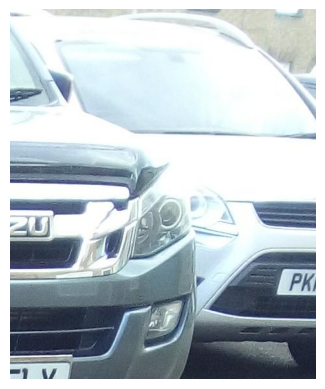

In [128]:
d1 = cropped_images_data[2]
first_cropped = d1['cropped_image']
plt.imshow(first_cropped[:,:,::-1])
plt.axis('off')
plt.show()

In [129]:
d1_results = license_plate_detector(first_cropped)


0: 640x544 2 LicensePlates, 154.2ms
Speed: 5.6ms preprocess, 154.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


In [130]:
d1_results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.4346, 0.4310], device='cuda:0')
data: tensor([[4.1217e+02, 3.9699e+02, 4.7300e+02, 4.4456e+02, 4.3457e-01, 0.0000e+00],
        [0.0000e+00, 5.4121e+02, 9.4720e+01, 5.7145e+02, 4.3103e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (572, 473)
shape: torch.Size([2, 6])
xywh: tensor([[442.5856, 420.7754,  60.8288,  47.5716],
        [ 47.3599, 556.3333,  94.7199,  30.2413]], device='cuda:0')
xywhn: tensor([[0.9357, 0.7356, 0.1286, 0.0832],
        [0.1001, 0.9726, 0.2003, 0.0529]], device='cuda:0')
xyxy: tensor([[412.1712, 396.9896, 473.0000, 444.5612],
        [  0.0000, 541.2126,  94.7199, 571.4540]], device='cuda:0')
xyxyn: tensor([[0.8714, 0.6940, 1.0000, 0.7772],
        [0.0000, 0.9462, 0.2003, 0.9990]], device='cuda:0')

In [131]:
d1_results[0].show()

In [132]:
d1_results[0].boxes.conf

tensor([0.4346, 0.4310], device='cuda:0')

##### Thresholding 
We have noticed that sometimes the license plate detector can detect some other regions that does not contains any license plates. It may contains Brand Name or other text on the vehicle. To address this issue, we can apply two types of thresholding for getting the license plate. First approach can be confidence score thresholding, which is reasonable but sometimes wrong boxes may have higher confidence. Second approach is to apply OCR to those detected boxes and extract text, then we can check for the specific pattern for a license plate. My initila assumption, the license plate must contains numbers where Brand Names not! However, redundant text also can contains number, but if we can assure a specific pattern for the license plate then this issue may effectively solved!

###### Conf Score
We can set the minimum confidence score of the license plate for detecting a plate as 0.5. We will discard the boxes that have conf scores less than this threshold. But it is obvious, sometimes a wrong prediction may have larger probability, which is an issue!


0: 480x640 2 LicensePlates, 223.9ms
Speed: 4.5ms preprocess, 223.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Total detected Boxes: 2
Detected Boxes: [[     691.25      629.22      953.56      700.68]
 [     762.53      397.03      918.23      439.25]]
Conf Score: [    0.90922     0.26403]
For Box 0: -->
Box values: [     691.25      629.22      953.56      700.68]
Box Score: 0.9092229008674622
For Box 1: -->
Box values: [     762.53      397.03      918.23      439.25]
Box Score: 0.26403355598449707


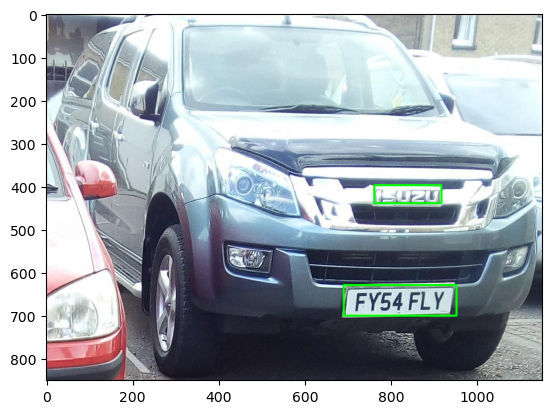


0: 608x640 1 LicensePlate, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)
Total detected Boxes: 1
Detected Boxes: [[     384.43      747.61      779.84       840.1]]
Conf Score: [    0.91219]
For Box 0: -->
Box values: [     384.43      747.61      779.84       840.1]
Box Score: 0.9121851921081543


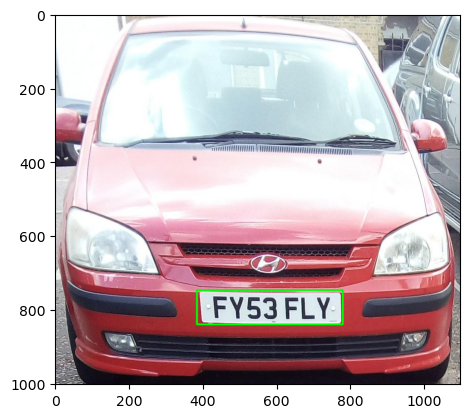


0: 640x544 2 LicensePlates, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 544)
Total detected Boxes: 2
Detected Boxes: [[     412.17      396.99         473      444.56]
 [          0      541.21       94.72      571.45]]
Conf Score: [    0.43457     0.43103]
For Box 0: -->
Box values: [     412.17      396.99         473      444.56]
Box Score: 0.43456652760505676
For Box 1: -->
Box values: [          0      541.21       94.72      571.45]
Box Score: 0.43103399872779846


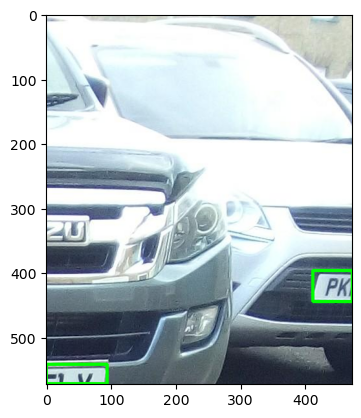


0: 576x640 (no detections), 5.0ms
Speed: 3.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)
Total detected Boxes: 0
Detected Boxes: []
Conf Score: []


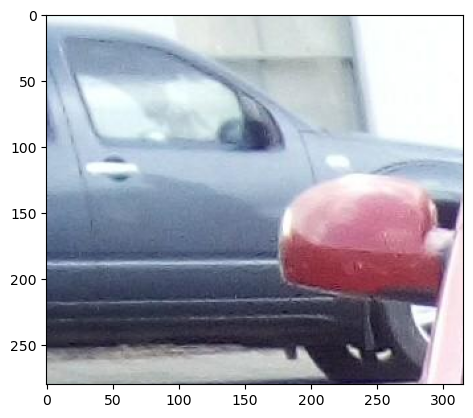

In [134]:
# adding conf score threshold 
conf_threshold = 0.5
n_license_plates = []

for data in cropped_images_data:
    cropped_img = data['cropped_image']
    annot_img = cropped_img.copy()
    obj_class = data['class']
    obj_score = data['score']

    ld_results = license_plate_detector(cropped_img)
    if ld_results:
        # Process results
        for result in ld_results:
            boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes (x1, y1, x2, y2)
            print(f"Total detected Boxes: {len(boxes)}")
            print(f"Detected Boxes: {boxes}")
            scores = result.boxes.conf.cpu().numpy()  # Extract confidence scores
            print(f"Conf Score: {scores}")
            for i, box in enumerate(boxes):
                print(f"For Box {i}: -->")
                print(f"Box values: {box}")
                print(f"Box Score: {scores[i]}")
                # crop the detected regions that has higher conf scores than the threshold
                if scores[i] > conf_threshold:
                    # Get the bounding box coordinates (x1, y1, x2, y2)
                    x1, y1, x2, y2 = box.astype(int)
                    plate = cropped_img[y1-5:y2+5, x1-5:x2+5]
                    n_license_plates.append(plate)
                # drawing boxes
                x1, y1, x2, y2 = map(int, box)  # Convert to integer
                cv2.rectangle(annot_img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw bounding box
            plt.imshow(annot_img[:,:,::-1])
            plt.show()
            
    

In [135]:
len(n_license_plates)

2

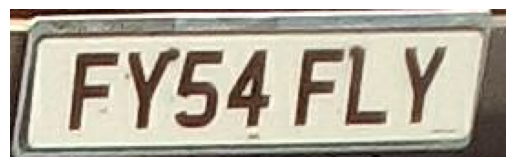

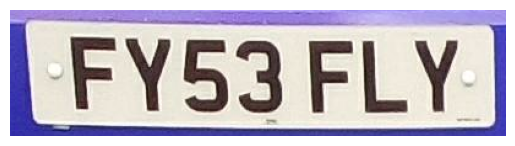

In [136]:
for i in range(len(n_license_plates)):
    plt.imshow(n_license_plates[i])
    plt.axis('off')
    plt.show()

###### OCR threshold

In [137]:
import pytesseract

In [138]:
# FUNCTION TO BUILD TESSERACT
def build_tesseract_options(psm=7):
		# tell Tesseract to only OCR alphanumeric characters
		alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
		options = "-c tessedit_char_whitelist={}".format(alphanumeric)
		# set the PSM mode
		options += " --psm {}".format(psm)
		# return the built options string
		return options

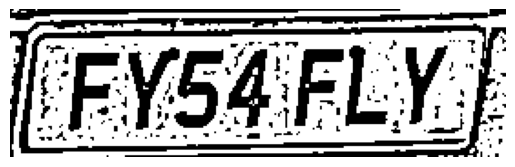

Trying PSM 1...
Extracted Text (PSM 1): 
Trying PSM 3...
Extracted Text (PSM 3): 
Trying PSM 6...
Extracted Text (PSM 6): 
Trying PSM 7...
Extracted Text (PSM 7): 
Trying PSM 8...
Extracted Text (PSM 8): [FYS4 FLY]


In [145]:
# taking a license plate from the selected plates
demo = n_license_plates[0]

# Convert to grayscale
demo = cv2.cvtColor(demo, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
demo = cv2.GaussianBlur(demo, (3,3), 0)

# Apply adaptive thresholding for better contrast
demo = cv2.adaptiveThreshold(demo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Show processed image
plt.imshow(demo, cmap='gray')
plt.axis('off')
plt.show()

# Try different PSM values
for psm in [1,3, 6, 7, 8, 11]:  # Experiment with these modes
    print(f"Trying PSM {psm}...")
    config = f'--psm {psm} --oem 3'  # OEM 3 uses deep learning-based OCR

    lpText = pytesseract.image_to_string(demo, config=config)
    print(f"Extracted Text (PSM {psm}): {lpText.strip()}")

    if lpText.strip():  # If text is detected, break the loop
        break

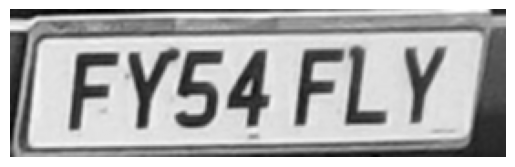

Trying PSM 1...
Extracted Text (PSM 1): 
Trying PSM 3...
Extracted Text (PSM 3): 
Trying PSM 6...
Extracted Text (PSM 6): FY54 FLY]


In [149]:
# taking a license plate from the selected plates
demo = n_license_plates[0]

# Convert to grayscale
demo = cv2.cvtColor(demo, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
demo = cv2.GaussianBlur(demo, (3,3), 0)

# Apply adaptive thresholding for better contrast
# demo = cv2.adaptiveThreshold(demo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Show processed image
plt.imshow(demo, cmap='gray')
plt.axis('off')
plt.show()

# Try different PSM values
for psm in [1,3, 6, 7, 8, 11]:  # Experiment with these modes
    print(f"Trying PSM {psm}...")
    config = f'--psm {psm} --oem 3'  # OEM 3 uses deep learning-based OCR

    lpText = pytesseract.image_to_string(demo, config=config)
    print(f"Extracted Text (PSM {psm}): {lpText.strip()}")

    if lpText.strip():  # If text is detected, break the loop
        break

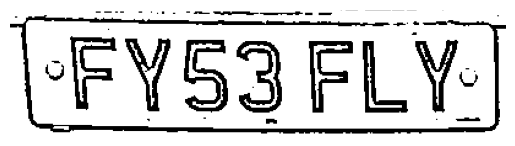

Trying PSM 1...
Extracted Text (PSM 1): (FYS3 FLY]
Trying PSM 3...
Extracted Text (PSM 3): (FYS3 FLY]
Trying PSM 6...
Extracted Text (PSM 6): (FYS3 FLY]
Trying PSM 7...
Extracted Text (PSM 7): (FYS3 FLY]
Trying PSM 8...
Extracted Text (PSM 8): PFYS3 FLY]
Trying PSM 11...
Extracted Text (PSM 11): FYS3 FLY]
Trying PSM 13...
Extracted Text (PSM 13): PFYS3 FLY]


In [161]:
# taking a license plate from the selected plates
demo = n_license_plates[1]

# Convert to grayscale
demo = cv2.cvtColor(demo, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
demo = cv2.GaussianBlur(demo, (3,3), 0)

# Apply adaptive thresholding for better contrast
demo = cv2.adaptiveThreshold(demo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 6)

# Show processed image
plt.imshow(demo, cmap='gray')
plt.axis('off')
plt.show()

# Try different PSM values
for psm in [1, 3, 6, 7, 8, 11,13]:  # Experiment with these modes
    print(f"Trying PSM {psm}...")
    config = f'--psm {psm} --oem 3'  # OEM 3 uses deep learning-based OCR

    lpText = pytesseract.image_to_string(demo, config=config)
    print(f"Extracted Text (PSM {psm}): {lpText.strip()}")

    # if lpText.strip():  # If text is detected, break the loop
    #     break

In [155]:
lpText

'nt ctf tenance anny pena\n\nFY53 FLY\n'

In [ ]:
# track vehicle 
# read bangla number plate 
# logic for a number plate pattern 

#### License Number Recognition (OCR)

In [49]:
!pip install pytesseract

  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)


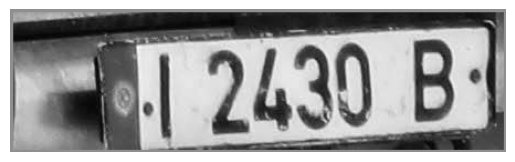

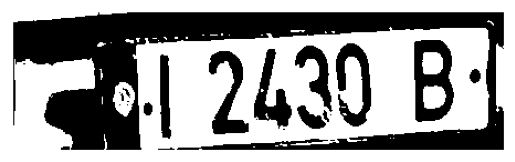

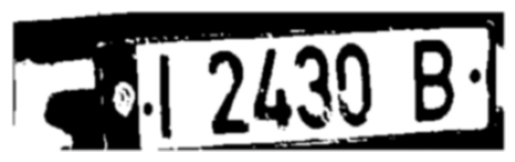

Detected License Plate for Gray: | 2430 B
Detected License Plate Before Blurred: mat | 2420 B
Detected License Plate After Blurred: mat | 2420 B


In [19]:
import pytesseract

# Load the cropped license plate image
# cropped_plate = cv2.imread("cropped_plate.jpg")

# Convert to grayscale (Tesseract works better with grayscale images)
gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_plate, cmap='gray')
plt.axis('off')
plt.show()

# Apply thresholding to enhance contrast
_, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh_plate, cmap='gray')
plt.axis('off')
plt.show()

# Applying Gaussian blur 
blurred = cv2.GaussianBlur(thresh_plate, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

# Perform OCR (Optical Character Recognition)
license_text_gray = pytesseract.image_to_string(gray_plate, config="--psm 8")
print("Detected License Plate for Gray:", license_text_gray.strip())

# Perform OCR (Optical Character Recognition)
license_text = pytesseract.image_to_string(thresh_plate, config="--psm 8")
print("Detected License Plate Before Blurred:", license_text.strip())

# After applying blur 
license_text_blur = pytesseract.image_to_string(blurred, config="--psm 8")
print("Detected License Plate After Blurred:", license_text_blur.strip())

In [77]:
!pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 645.7 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.9 MB 645.7 kB/s eta 0:00:04
   ---------- ----------------------------- 0.8/2.9 MB 589.1 kB/s eta 0:00:04
   ---------- ----------------------------- 0.8/2.9 MB 589.1 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 578.7 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 578.7 kB/s eta 0:00:04
   -------------- ------------------------- 1.0/2.9 MB 578.7 kB/s eta 0:00:04
   ------------------ --------------------- 1.3/2.9 MB 569.0 kB/s eta 0:00:03
   ------------------ ---------

In [20]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(thresh_plate)

In [21]:
result

[([[167, 20], [418, 20], [418, 123], [167, 123]], '2030 B', 0.50077705973133)]

In [22]:
p_results = result[0]
plate_box, plate_text, plate_conf = p_results

In [23]:
print(f"License number: {plate_text.upper()}")

License number: 2030 B


In [24]:
gray_result = reader.readtext(gray_plate)
gray_result[0][1]

'23 B'